<center> <h2> Discussion </h2> </center> 

#### Libraries

In [8]:
import os, re 
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I. Loading the data

In [9]:
def identity(x):
    return x

def tokenizetmp(x):
    return x.split()

with open('benchmark_artifacts.pickle', 'rb') as handle:
    benchmark = pickle.load(handle)

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
indtrain = benchmark['indtrain']
tfidf = benchmark['tfidf-estimator']
data = pd.read_csv('./cleandata/data.csv')
train = data.loc[indtrain].copy()
x_train = tfidf.transform(train['processed']).toarray().astype('float32')
y_train = np.array([(x=='True')*1 for x in train['label']]).astype('float32')
data = train = None

In [12]:
train = pd.concat([pd.DataFrame(y_train,columns=['target_label']),
                   pd.DataFrame(x_train,columns=tfidf.vocabulary_)],axis=1)

In [14]:
x_train = y_train = None

In [15]:
train.head()

,target_label,digit_token,trump,said,state,president,would,people,year,republican,...,homeless,discriminate,semi,dyer,restructuring,prohibited,coordinate,centrist,sway,espionage
0,1.0,0.040589,0.037359,0.101937,0.076857,0.054462,0.055709,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.109916,0.028563,0.037687,0.071215,0.072845,0.040068,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.125568,0.123832,0.019308,0.050950,0.000000,0.098482,0.027084,0.0,0.097095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,0.000000,0.038559,0.050877,0.048069,0.000000,0.054090,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.046693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### II. Highly Separable Data ?

#### Projection of BOW features

In [37]:
import seaborn as sns
from sklearn.manifold import TSNE

In [71]:
train1 = train[train['target_label']==1].iloc[:250,1:]
train2 = train[train['target_label']==0].iloc[:250,1:]
subdata = pd.concat([train1,train2],axis=0)

In [72]:
tsne = TSNE(2)
projection = tsne.fit_transform(subdata)

In [82]:
df = np.concatenate([projection[:250],projection[250:]],axis=1)
df = pd.DataFrame(df,columns=['x','y','w','z'])

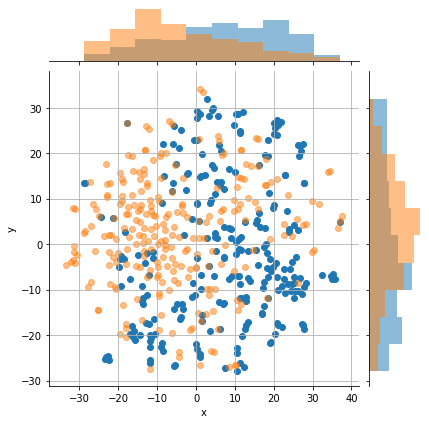

In [85]:
p = sns.JointGrid(x = df['x'],y = df['y'])
p = p.plot_joint(plt.scatter)
def scatter(*args, **kwargs):
    args = (df['w'], df['z'])
    kwargs['alpha'] = 0.5
    plt.scatter(*args, **kwargs)
p = p.plot_joint(scatter)
p.ax_marg_x.hist(df['x'],alpha = 0.5)
p.ax_marg_y.hist(df['y'],orientation = 'horizontal',alpha = 0.5)
p.ax_marg_x.hist(df['w'],alpha = 0.5,range = (np.min(df['x']), np.max(df['x'])))
p.ax_marg_y.hist(df['z'],orientation = 'horizontal',alpha = 0.5,range = (np.min(df['y']), np.max(df['y'])))
plt.grid(True)
plt.show()
#plt.savefig('./images/jointplot_projection.pdf',bbox_inches='tight')

In [89]:
train = train1 = train2 = subdata = None

#### Topic Modelling in the training set

See : https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [91]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
data = pd.read_csv('./cleandata/data.csv')
train = data.loc[indtrain].copy()
data = None

In [96]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(train['processed'])

In [97]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
digit_token police people year said one black group american muslim

Topic #1:
digit_token clinton said election campaign state trump hillary party russian

Topic #2:
trump digit_token reference_token president republican donald people said url_token one

Topic #3:
digit_token said trump state would president united republican house reuters

Topic #4:
digit_token said court government state reuters year people law would
